In [5]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
out_dir="./01_DTs/"
filename_out = "synthetic_observational_cate" 
metrics = ["norm_erupt", "qini","energy_distance"]

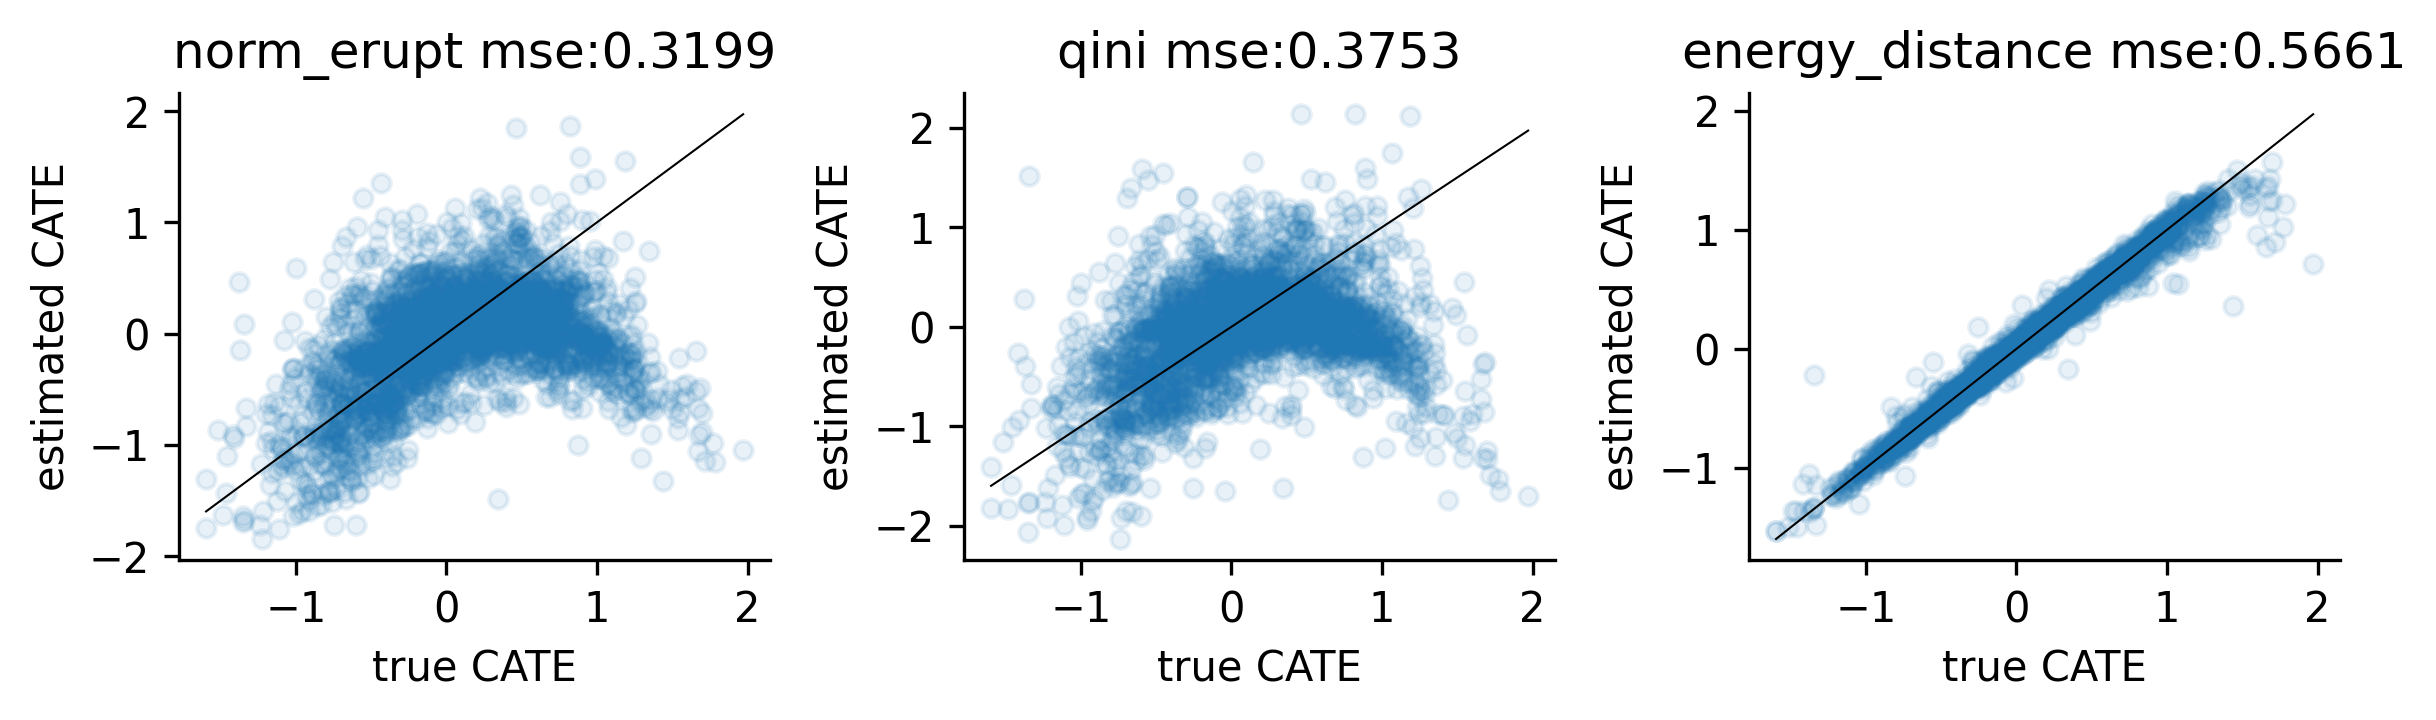

In [7]:
%matplotlib inline
f, axs = plt.subplots(1,len(metrics),figsize=(8,2.5),dpi=300)


# plot true against estimated for best estimator:
for ax, metric in zip(axs, metrics):
    try:
        with open(f"{out_dir}{filename_out}_{metric}_run_1.pkl","rb") as f:
            results = pickle.load(f)
        CATE_gt = results["scores_per_estimator"][results["best_estimator"]][0]["test"]["CATE_groundtruth"].values
        CATE_est = results["scores_per_estimator"][results["best_estimator"]][0]["test"]["CATE_estimate"]
        mse=np.mean((CATE_gt-CATE_est)**2)
        ax.scatter(CATE_gt,CATE_est,s=20,alpha=0.1)        
        ax.plot([min(CATE_gt),max(CATE_gt)],[min(CATE_gt),max(CATE_gt)],"k-",linewidth=0.5)
        ax.set_xlabel("true CATE")
        ax.set_ylabel("estimated CATE")
        ax.set_title(f"{results['optimised_metric']} mse:{mse:1.4f}")
        #ax.set_xlim([-15,15])
        #ax.set_ylim([-15,15])
        #ax.set_xticks
        (np.arange(-0.5,0.51,0.5))
        #ax.set_yticks(np.arange(-0.5,0.51,0.5))
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
    except:
        print("here")
        pass
plt.tight_layout() 

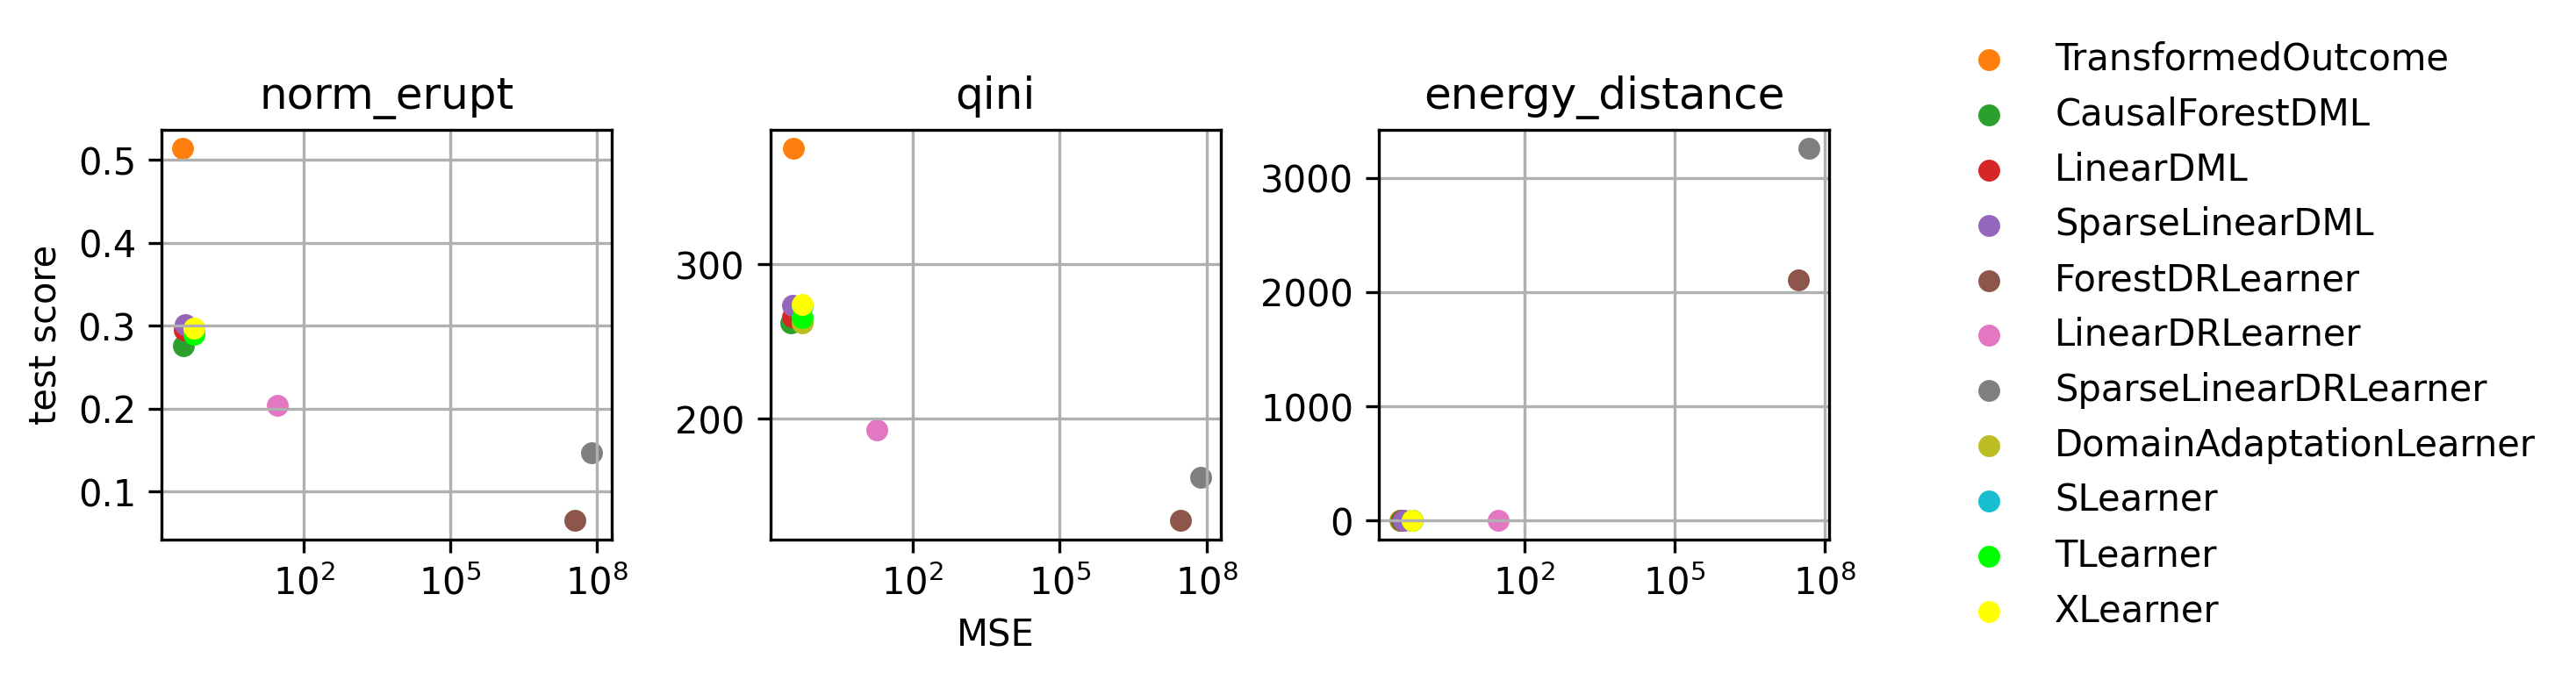

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ([matplotlib.colors.CSS4_COLORS['black']] +
    list(matplotlib.colors.TABLEAU_COLORS) + [
    matplotlib.colors.CSS4_COLORS['lime'],
    matplotlib.colors.CSS4_COLORS['yellow'],
    matplotlib.colors.CSS4_COLORS['pink']
])

plt.figure(figsize=(10,2.5),dpi=300)
# f, axs = plt.subplots(1,len(metrics),)

est_labels = [[], [], []]
sc = [[], [], []]
for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i+1)
    with open(f"{out_dir}{filename_out}_{metric}_run_1.pkl","rb") as f:
        results = pickle.load(f)
    
    for (est_name, scr), col in zip(results["scores_per_estimator"].items(),colors): 
        if "Dummy" not in est_name:
            if len(scr):
                CATE_gt = scr[0]["test"]["CATE_groundtruth"].values
                CATE_est = scr[0]["test"]["CATE_estimate"]
                mse=np.mean((CATE_gt-CATE_est)**2)
                score = scr[0]["test"][metric]
                plt.scatter(mse,score,color=col,s=30,linewidths=0.5)
                est_labels[i].append(est_name.split(".")[-1])
    if i == 1:
        plt.xlabel("MSE")    
    if i == 0:
        plt.ylabel("test score") 
    plt.title(metric)
    plt.xscale("log")    
    #plt.xlim(10**-4.1,10**-2.6)
    plt.grid(True)
    
plt.legend(est_labels[0],loc='center left', bbox_to_anchor=(1.2, 0.5),frameon=False)
plt.tight_layout()
plt.savefig(f"paper_{filename_out}_scores.pdf",format="pdf")
plt.show()

In [14]:
with open(f"{out_dir}{filename_out}_energy_distance_run_1.pkl","rb") as f:
    results = pickle.load(f)

In [15]:
for (est_name, scr), col in zip(results["scores_per_estimator"].items(),colors): 
        if "Dummy" not in est_name:
            if len(scr):
                CATE_gt = scr[0]["test"]["CATE_groundtruth"].values
                CATE_est = scr[0]["test"]["CATE_estimate"]
                mse=np.mean((CATE_gt-CATE_est)**2)
                score = scr[0]["test"]["energy_distance"]
                print(f'{est_name:60s} {np.mean(score):1.4f} {mse:1.4f}')

backdoor.auto_causality.models.TransformedOutcome            0.2480 0.3144
backdoor.econml.dml.CausalForestDML                          0.2392 0.3336
backdoor.econml.dml.LinearDML                                0.2372 0.3614
backdoor.econml.dml.SparseLinearDML                          0.2370 0.3702
backdoor.econml.dr.ForestDRLearner                           2109.4022 30301075.7213
backdoor.econml.dr.LinearDRLearner                           1.2975 29.4764
backdoor.econml.dr.SparseLinearDRLearner                     3256.0445 49357722.3174
backdoor.econml.metalearners.DomainAdaptationLearner         0.2178 0.5638
backdoor.econml.metalearners.SLearner                        0.2180 0.5624
backdoor.econml.metalearners.TLearner                        0.2178 0.5661
backdoor.econml.metalearners.XLearner                        0.2179 0.5565
